In [3]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

In [49]:
# From https://github.com/erikgregorywebb/datasets/blob/master/nba-salaries.csv
nba = Table.read_table('nba_salaries.csv')
nba

rank,name,position,team,salary,season
1,Shaquille O'Neal,C,Los Angeles Lakers,17142000,2000
2,Kevin Garnett,PF,Minnesota Timberwolves,16806000,2000
3,Alonzo Mourning,C,Miami Heat,15004000,2000
4,Juwan Howard,PF,Washington Wizards,15000000,2000
5,Scottie Pippen,SF,Portland Trail Blazers,14795000,2000
6,Karl Malone,PF,Utah Jazz,14000000,2000
7,Larry Johnson,F,New York Knicks,11910000,2000
8,Gary Payton,PG,Seattle SuperSonics,11020000,2000
9,Rasheed Wallace,PF,Portland Trail Blazers,10800000,2000
10,Shawn Kemp,C,Cleveland Cavaliers,10780000,2000


In [50]:
point_guards = nba.where('position', 'PG').where('season', 2020)

In [51]:
point_guards

rank,name,position,team,salary,season
1,Stephen Curry,PG,Golden State Warriors,40231758,2020
2,Chris Paul,PG,Oklahoma City Thunder,38506482,2020
3,Russell Westbrook,PG,Houston Rockets,38506482,2020
4,John Wall,PG,Washington Wizards,38199000,2020
8,Kyle Lowry,PG,Toronto Raptors,34996296,2020
14,Kemba Walker,PG,Boston Celtics,32742000,2020
16,Mike Conley,PG,Utah Jazz,32511624,2020
17,Kyrie Irving,PG,Brooklyn Nets,31742000,2020
21,Damian Lillard,PG,Portland Trail Blazers,29802321,2020
52,Malcolm Brogdon,PG,Indiana Pacers,20000000,2020


In [52]:
point_guards.drop('position')

rank,name,team,salary,season
1,Stephen Curry,Golden State Warriors,40231758,2020
2,Chris Paul,Oklahoma City Thunder,38506482,2020
3,Russell Westbrook,Houston Rockets,38506482,2020
4,John Wall,Washington Wizards,38199000,2020
8,Kyle Lowry,Toronto Raptors,34996296,2020
14,Kemba Walker,Boston Celtics,32742000,2020
16,Mike Conley,Utah Jazz,32511624,2020
17,Kyrie Irving,Brooklyn Nets,31742000,2020
21,Damian Lillard,Portland Trail Blazers,29802321,2020
52,Malcolm Brogdon,Indiana Pacers,20000000,2020


In [53]:
point_guards

rank,name,position,team,salary,season
1,Stephen Curry,PG,Golden State Warriors,40231758,2020
2,Chris Paul,PG,Oklahoma City Thunder,38506482,2020
3,Russell Westbrook,PG,Houston Rockets,38506482,2020
4,John Wall,PG,Washington Wizards,38199000,2020
8,Kyle Lowry,PG,Toronto Raptors,34996296,2020
14,Kemba Walker,PG,Boston Celtics,32742000,2020
16,Mike Conley,PG,Utah Jazz,32511624,2020
17,Kyrie Irving,PG,Brooklyn Nets,31742000,2020
21,Damian Lillard,PG,Portland Trail Blazers,29802321,2020
52,Malcolm Brogdon,PG,Indiana Pacers,20000000,2020


In [54]:
point_guards = point_guards.drop('rank', 'position', 'season')

In [55]:
point_guards.show(10)

name,team,salary
Stephen Curry,Golden State Warriors,40231758
Chris Paul,Oklahoma City Thunder,38506482
Russell Westbrook,Houston Rockets,38506482
John Wall,Washington Wizards,38199000
Kyle Lowry,Toronto Raptors,34996296
Kemba Walker,Boston Celtics,32742000
Mike Conley,Utah Jazz,32511624
Kyrie Irving,Brooklyn Nets,31742000
Damian Lillard,Portland Trail Blazers,29802321
Malcolm Brogdon,Indiana Pacers,20000000


In [56]:
point_guards.sort('salary').show(10)

name,team,salary
Ky Bowman,Golden State Warriors,350189
Reggie Jackson,LA Clippers,512721
Brandon Goodwin,Atlanta Hawks,522738
Chris Clemons,Houston Rockets,563347
Justin Robinson,Washington Wizards,898310
Jalen Lecque,Phoenix Suns,898310
Gary Payton II,Washington Wizards,1052909
Carsen Edwards,Boston Celtics,1228026
Devonte' Graham,Charlotte Hornets,1416852
Jevon Carter,Phoenix Suns,1416852


In [57]:
nba = nba.where('season', 2020).drop('season')
nba.show(5)

rank,name,position,team,salary
1,Stephen Curry,PG,Golden State Warriors,40231758
2,Chris Paul,PG,Oklahoma City Thunder,38506482
3,Russell Westbrook,PG,Houston Rockets,38506482
4,John Wall,PG,Washington Wizards,38199000
5,Kevin Durant,SF,Brooklyn Nets,38199000


In [58]:
warriors = nba.where('team', 'Golden State Warriors')
warriors.show(5)

rank,name,position,team,salary
1,Stephen Curry,PG,Golden State Warriors,40231758
13,Klay Thompson,SG,Golden State Warriors,32742000
60,Draymond Green,PF,Golden State Warriors,18539130
223,Kevon Looney,PF,Golden State Warriors,4464226
316,Willie Cauley-Stein,C,Golden State Warriors,2177483


In [59]:
warriors.column('salary')

array([40231758, 32742000, 18539130,  4464226,  2177483,  1964760,
        1897800,   898310,   898310,   842327,   654469,   350189,   350189])

In [60]:
np.average(warriors.column('salary'))

8154688.538461538

In [61]:
suns = nba.where('team', 'Phoenix Suns')

In [62]:
np.average(warriors.column('salary')) - np.average(suns.column('salary'))

2393314.5910931174

In [63]:
np.sum(warriors.column('salary')) - np.sum(suns.column('salary'))

-3455154

In [64]:
warriors.num_rows

13

In [65]:
suns.num_rows

19

### Functions Can Take Multiple Arguments ###

Example: Calculate the Hypotenuse Length of a Right Triangle


Pythagoras's Theorem: If $x$ and $y$ denote the lengths of the right-angle sides, then the hypotenuse length $h$ satisfies:

$$ h^2 = x^2 + y^2 \qquad \text{which implies}\qquad \hspace{20 pt} h = \sqrt{ x^2 + y^2 } $$

In [66]:
def hypotenuse(x, y):
    hypot_squared = (x ** 2 + y ** 2)
    hypot = hypot_squared ** 0.5
    return hypot

In [67]:
hypotenuse(1, 2)

2.23606797749979

In [68]:
hypotenuse(3, 4)

5.0

### Example: A function that takes the year of birth of a person and produces their age in years. ###

In [69]:
def age(year):
    age = 2022 - year
    return age

In [70]:
age(1942)

80

In [71]:
def name_and_age(name, year):
    return name + ' is ' + str(age(year)) + ' years old.'

In [72]:
name_and_age('Joe', 1942)

'Joe is 80 years old.'

## Prediction ##

In [73]:
families = Table.read_table('family_heights.csv')
families

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


In [74]:
parent_avgs = (families.column('father') + families.column('mother'))/2

In [75]:
heights = Table().with_columns(
    'Parent Average', parent_avgs,
    'Child', families.column('child'),
    'Sex', families.column('sex')
)
heights

Parent Average,Child,Sex
72.75,73.2,male
72.75,69.2,female
72.75,69,female
72.75,69,female
71,73.5,male
71,72.5,male
71,65.5,female
71,65.5,female
69.5,71,male
69.5,68,female


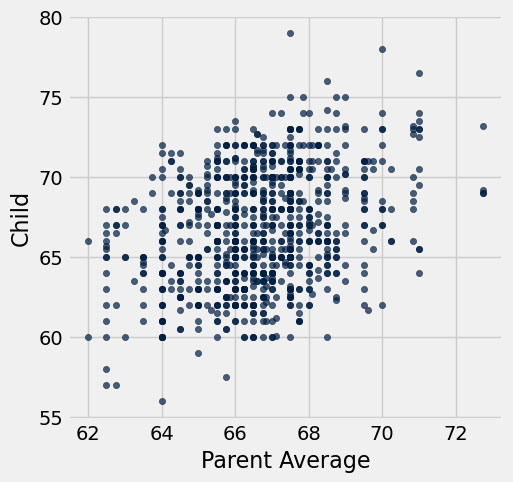

In [76]:
heights.scatter('Parent Average', 'Child')

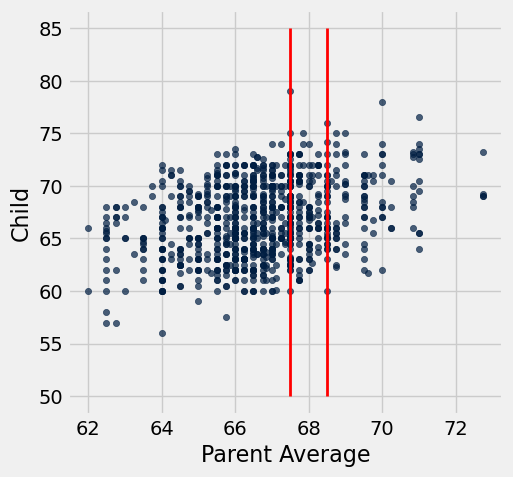

In [77]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [78]:
nearby = heights.where('Parent Average', are.between(67.5, 68.5))
nearby_mean = np.average(nearby.column('Child'))
nearby_mean

67.620000000000005

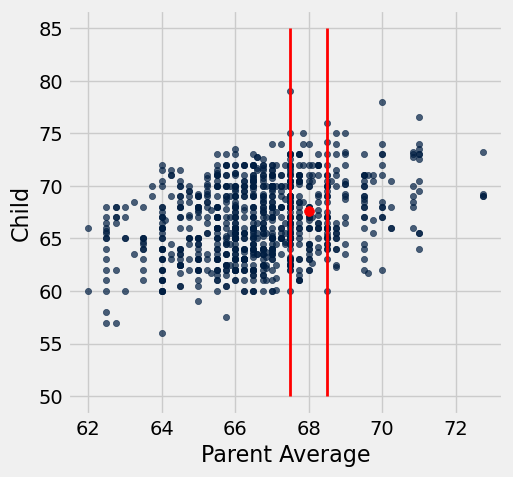

In [79]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='red', s=50);

In [80]:
def predict(h):
    nearby = heights.where('Parent Average', are.between(h - 1/2, h + 1/2))
    return np.average(nearby.column('Child'))

In [81]:
predict(68)

67.620000000000005

In [82]:
predict(70)

68.561904761904756

In [83]:
predict(73)

70.099999999999994

In [84]:
predicted_heights = heights.apply(predict, 'Parent Average')

In [85]:
heights = heights.with_column('Prediction', predicted_heights)

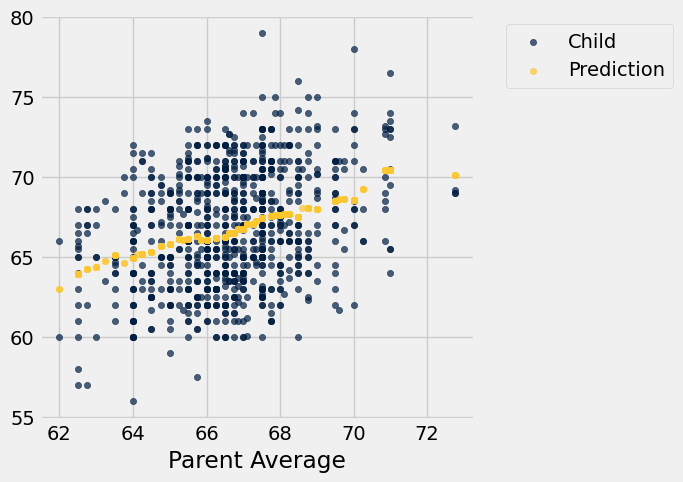

In [86]:
heights.select('Parent Average', 'Child', 'Prediction').scatter('Parent Average')

## Bike Sharing ##

In [87]:
trip = Table.read_table('trip.csv')
trip.show(3)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107


## Distribution of Durations ##

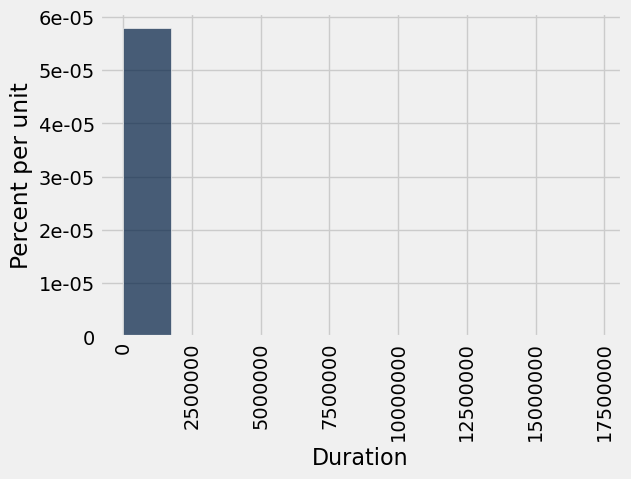

In [88]:
trip.hist('Duration')

In [89]:
trip.sort('Duration', descending=True)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
568474,17270400,12/6/2014 21:59,South Van Ness at Market,66,6/24/2015 20:18,2nd at Folsom,62,535,Customer,95531
825850,2137000,6/28/2015 21:50,Market at Sansome,77,7/23/2015 15:27,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213
750192,1852590,5/2/2015 6:17,San Antonio Shopping Center,31,5/23/2015 16:53,Castro Street and El Camino Real,32,680,Subscriber,94024
841176,1133540,7/10/2015 10:35,University and Emerson,35,7/23/2015 13:27,University and Emerson,35,262,Customer,94306
522337,720454,10/30/2014 8:29,Redwood City Caltrain Station,22,11/7/2014 15:36,Stanford in Redwood City,25,692,Customer,94010
774999,688899,5/20/2015 15:27,Palo Alto Caltrain Station,34,5/28/2015 14:49,California Ave Caltrain Station,36,230,Customer,nil
635260,655939,2/8/2015 3:05,San Jose Civic Center,3,2/15/2015 17:17,SJSU 4th at San Carlos,12,132,Customer,89451
745640,611240,4/29/2015 9:41,University and Emerson,35,5/6/2015 11:28,San Antonio Shopping Center,31,196,Customer,81
635263,602338,2/8/2015 3:09,San Jose Civic Center,3,2/15/2015 2:28,San Jose Civic Center,3,9,Customer,89451
779645,594550,5/24/2015 13:33,San Pedro Square,6,5/31/2015 10:42,San Pedro Square,6,39,Customer,95118


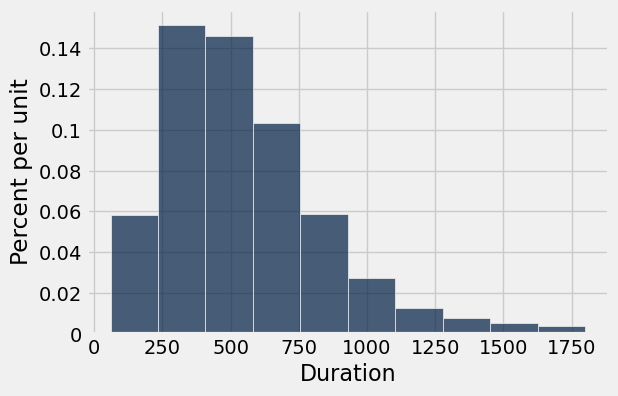

In [90]:
commute = trip.where('Duration', are.below(1800))
commute.hist('Duration')

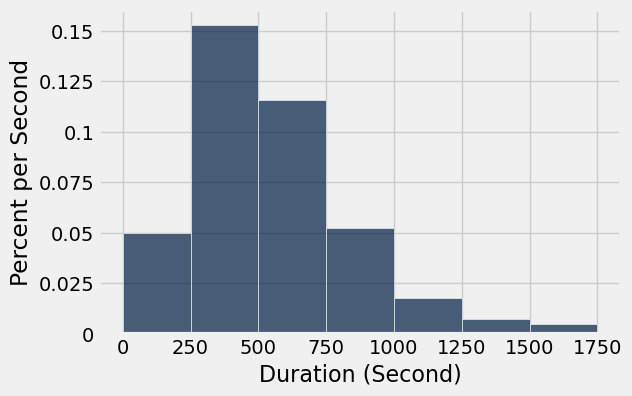

In [91]:
commute.hist('Duration', bins=np.arange(0, 1800, 250), unit='Second')

In [92]:
# Approx percent of people who have 
# a ride duration between 250 and 500 seconds
# "between" = [250, 500) 

(500-250) * 0.15 

37.5

In [93]:
commute.where('Duration', are.between(250, 500)).num_rows

129079

In [94]:
commute.num_rows

338343

In [95]:
129079 / 338343

0.38150338561755376

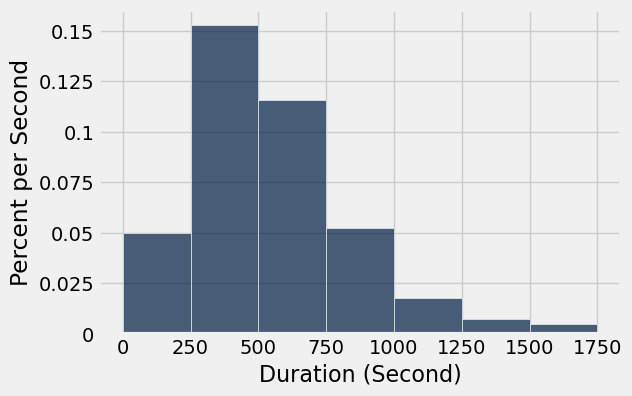

In [96]:
commute.hist('Duration', bins=np.arange(0, 1800, 250), unit='Second')

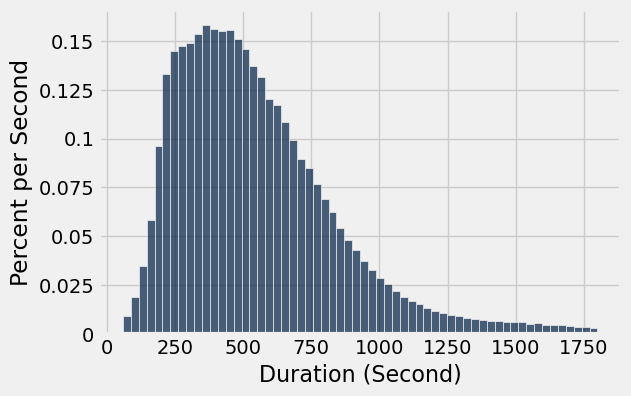

In [97]:
commute.hist('Duration', bins=60, unit='Second')

## Start and End Stations ##

In [98]:
# Most common start station

starts = commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


In [99]:
# Numbers of trips between stations

commute.pivot('Start Station', 'End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,54,190,554,107,0,0,40,21,0,0,44,78,54,0,9,77,32,41,14,0,0,11,30,416,53,0,0,169,114,302,33,0,0,0,0,0,0,60,121,88,0,0,0,0,0,0,0,0,0,694,445,21,0,0,0,0,0,0,0,0,38,57,0,0,39,237,342,0,17,31
2nd at South Park,295,164,71,180,0,0,208,85,0,0,112,87,160,0,37,56,178,83,116,0,0,57,73,574,500,0,0,139,199,1633,119,0,0,0,0,0,0,299,84,113,0,0,0,0,0,0,0,0,0,559,480,48,0,0,0,0,0,0,0,0,66,152,0,0,374,429,143,0,63,209
2nd at Townsend,437,151,185,92,0,0,608,350,0,0,80,329,168,0,386,361,658,506,254,0,0,27,315,2607,295,0,0,110,225,845,177,0,0,0,0,0,0,120,100,141,0,0,0,0,0,0,0,0,0,905,299,14,0,0,0,0,0,0,0,0,72,508,0,0,2349,784,417,0,57,166
5th at Howard,113,177,148,83,0,0,59,130,0,0,203,76,129,0,30,57,49,166,54,0,0,85,78,371,478,0,0,303,158,168,90,0,0,0,0,0,0,93,183,169,0,0,0,0,0,0,0,0,0,690,1859,48,0,0,0,0,0,0,0,0,116,102,0,0,182,750,200,0,43,267
Adobe on Almaden,0,0,0,0,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,7,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,7,7,16,0,0,0,0,0,19,23,265,0,20,4,5,10,0,0,14,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,7,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,5,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,24,3,7,0,0,0,0,0,6,20,7,0,56,12,38,259,0,0,13,0,0,0,0,0,0,0
Beale at Market,127,79,183,59,0,0,59,661,0,0,201,75,101,0,247,178,38,590,165,0,0,54,435,57,72,0,0,286,236,163,26,0,0,0,0,0,0,49,227,179,0,0,0,0,0,0,0,0,0,640,269,25,0,0,0,0,0,0,0,0,243,128,0,0,16,167,35,0,64,45
Broadway St at Battery St,67,89,279,119,0,0,1022,110,0,0,62,283,226,0,191,198,79,231,35,0,0,5,70,168,49,0,0,32,97,341,214,0,0,0,0,0,0,169,71,218,0,0,0,0,0,0,0,0,0,685,438,7,0,0,0,0,0,0,0,0,18,106,0,0,344,748,50,0,79,47
California Ave Caltrain Station,0,0,0,0,0,0,0,0,38,1,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,192,40,0,0,0,0,0,0,0,6,0,0,0,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,931,34,0,0,0,0,0,0,0,0,0,7,0,0,0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
# Average durations of trips between stations

commute.pivot('Start Station', 'End Station', values='Duration', collect=np.average)

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,702.13,253.874,309.087,418.065,0,0,424.15,740.714,0,0,668.886,516.897,495.519,0,862.889,388.117,493.469,1114.71,818.429,0,0,825,662.933,500.44,254.245,0,0,728.627,435.947,291.076,378.576,0,0,0,0,0,0,380.083,541.926,518.011,0,0,0,0,0,0,0,0,0,469.137,484.382,1037,0,0,0,0,0,0,0,0,836.684,365.579,0,0,575.923,250.553,646.038,0,617,386.032
2nd at South Park,196.085,618.116,237.366,507.394,0,0,450.279,715.247,0,0,900.679,589.368,612.456,0,640.081,317.625,404.27,940.253,648.948,0,0,732.632,815.671,501.608,230.486,0,0,834.396,513.307,323.982,423.605,0,0,0,0,0,0,328.813,616.429,567.77,0,0,0,0,0,0,0,0,0,281.635,349.079,780.958,0,0,0,0,0,0,0,0,831.879,359.105,0,0,490.479,356.287,473.056,0,722.063,395.474
2nd at Townsend,293.874,281.344,787.314,655.196,0,0,531.243,759.451,0,0,846.888,773.72,803.345,0,691.054,363.294,465.685,926.796,819.772,0,0,1070.59,919.073,609.987,371.105,0,0,877.591,731.92,506.895,673.452,0,0,0,0,0,0,666.625,865.7,776.333,0,0,0,0,0,0,0,0,0,262.334,310.047,985.214,0,0,0,0,0,0,0,0,1102.06,404.522,0,0,543.83,420.519,480.285,0,1092.67,585.169
5th at Howard,381.274,573.729,613.514,718.096,0,0,611.797,808.077,0,0,379.35,668.697,542.512,0,730.4,666.965,613.49,1056.59,952.167,0,0,469.741,834.692,676.55,281.975,0,0,449.548,295.297,414.857,545.6,0,0,0,0,0,0,410.043,255.956,357.799,0,0,0,0,0,0,0,0,0,434.022,386.263,605.708,0,0,0,0,0,0,0,0,553.362,584.98,0,0,662.308,406.225,546.84,0,972.07,206.704
Adobe on Almaden,0,0,0,0,462,583.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,942.176,616,0,0,0,0,0,0,0,0,0,463.92,0,0,0,0,0,0,0,639.857,858.571,534.438,0,0,0,0,0,546.316,399.435,292.702,0,360.4,684,1164.4,251.9,0,0,516.857,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,540.286,948.844,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,955.312,952.6,0,0,0,0,0,0,0,0,0,706.762,0,0,0,0,0,0,0,684.917,902.333,965,0,0,0,0,0,536.667,782.1,778,0,373.393,1127.92,1222.24,219.985,0,0,645,0,0,0,0,0,0,0
Beale at Market,360.701,603.873,685.934,625,0,0,720.932,282.033,0,0,627.423,273.973,303.168,0,232.777,441.483,300.5,498.2,352.467,0,0,697.074,416.986,465.877,329.5,0,0,731.175,386.292,217.528,350.115,0,0,0,0,0,0,340.857,502.335,374.793,0,0,0,0,0,0,0,0,0,783.228,792.387,809.92,0,0,0,0,0,0,0,0,781.634,301.297,0,0,438.75,207.94,953.429,0,465.688,444.689
Broadway St at Battery St,613.672,826.899,719.695,931.891,0,0,331.727,688.682,0,0,94

## Fastest Trips between Stations ##

In [101]:
duration = trip.select('Start Station', 'End Station', 'Duration')
duration

Start Station,End Station,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307
San Jose City Hall,San Salvador at 1st,409
Embarcadero at Folsom,Embarcadero at Sansome,789
Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain (Townsend at 4th),293
Embarcadero at Folsom,Embarcadero at Sansome,896
Embarcadero at Sansome,Steuart at Market,255
Beale at Market,Temporary Transbay Terminal (Howard at Beale),126
Post at Kearny,South Van Ness at Market,932


In [ ]:
shortest = duration.group(['Start Station', 'End Station'], min)
shortest.show(5)

## Conditional Statements

In [4]:
x = 20

In [5]:
if x >= 18:
    print('You can legally vote.')

You can legally vote.


In [6]:
if x >= 21:
    print('You can legally drink.')

In [7]:
def age(x):
    if x >= 18:
        return 'You can legally vote.'
    if x >= 21:
        return 'You can legally drink.'

In [8]:
age(3)

In [9]:
age(20)

'You can legally vote.'

In [10]:
age(25)

'You can legally vote.'

In [11]:
def age(x):
    if x >= 21:
        return 'You can legally vote and drink.'
    elif x >= 18:
        return 'You can legally vote.'
    else:
        return 'You can legally drink milk.'

In [12]:
age(3)

'You can legally drink milk.'

In [13]:
age(20)

'You can legally vote.'

In [14]:
age(23)

'You can legally vote and drink.'

### Random Selection

In [15]:
mornings = make_array('wake up', 'sleep in')

In [16]:
np.random.choice(mornings)

'wake up'

In [17]:
np.random.choice(mornings)

'sleep in'

In [18]:
np.random.choice(mornings)

'wake up'

We can also pass an argument that specifies how many times to make a random choice:

In [19]:
np.random.choice(mornings, 7)

array(['wake up', 'wake up', 'sleep in', 'wake up', 'sleep in', 'wake up',
       'sleep in'],
      dtype='<U8')

In [20]:
sum(np.random.choice(mornings, 7) == 'wake up')

4

In [21]:
sum(np.random.choice(mornings, 7) == 'sleep in')

5

In [22]:
morning_week = np.random.choice(mornings, 7)
morning_week

array(['sleep in', 'sleep in', 'sleep in', 'wake up', 'sleep in',
       'wake up', 'sleep in'],
      dtype='<U8')

In [23]:
sum(morning_week == 'wake up')

2

In [24]:
sum(morning_week == 'sleep in')

5

## `For` Statements

In [25]:
for pet in make_array('cat', 'dog', 'rabbit'):
    print('I love my ' + pet)

I love my cat
I love my dog
I love my rabbit


In [26]:
pet = make_array('cat', 'dog', 'rabbit').item(0)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(1)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(2)
print('I love my ' + pet)

I love my cat
I love my dog
I love my rabbit


### Another example: simulating heads in 100 coin tosses

In [27]:
coin = make_array('heads', 'tails')

In [28]:
sum(np.random.choice(coin, 100) == 'heads')

43

In [29]:
# Simulate one outcome

def num_heads():
    return sum(np.random.choice(coin, 100) == 'heads')

In [30]:
# Decide how many times you want to repeat the experiment

repetitions = 10000

In [31]:
# Simulate that many outcomes

outcomes = make_array()

for i in np.arange(repetitions):
    outcomes = np.append(outcomes, num_heads())

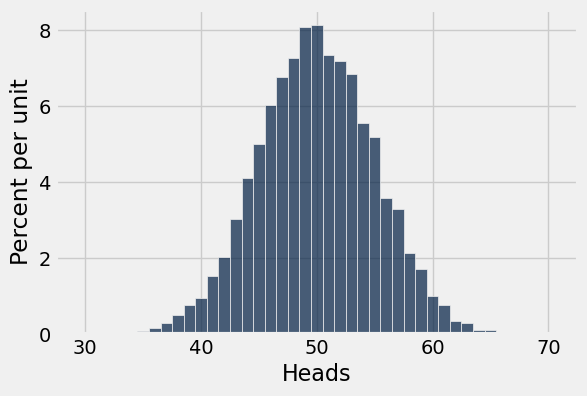

In [32]:
heads = Table().with_column('Heads', outcomes)
heads.hist(bins = np.arange(29.5, 70.6))

## Random Sampling ##

We load in a dataset of all United flights national flights from 6/1/15 to 8/9/15, their destination and how long they were delayed, in minutes.

In [33]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [34]:
united.where('Destination', 'JFK') 

Row,Date,Flight Number,Destination,Delay
26,6/1/15,502,JFK,-4
33,6/1/15,637,JFK,141
39,6/1/15,704,JFK,-8
50,6/1/15,758,JFK,-5
51,6/1/15,760,JFK,352
56,6/1/15,824,JFK,3
57,6/1/15,898,JFK,290
179,6/2/15,502,JFK,0
188,6/2/15,637,JFK,202
194,6/2/15,704,JFK,-11


In [35]:
united.take(np.arange(0, united.num_rows, 1000))

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1000,6/7/15,1692,EWR,7
2000,6/14/15,824,JFK,-1
3000,6/21/15,217,EWR,5
4000,6/27/15,1401,SAN,-4
5000,7/4/15,1614,LAS,-2
6000,7/11/15,401,CLE,4
7000,7/17/15,1645,IAD,0
8000,7/24/15,624,ORD,61
9000,7/30/15,1728,ORD,209


A random sample

In [36]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample.show()

Row,Date,Flight Number,Destination,Delay
448,6/4/15,222,LAX,-4
1448,6/10/15,1563,ORD,6
2448,6/17/15,698,ORD,26
3448,6/23/15,1947,PHL,33
4448,6/30/15,1401,LAS,8
5448,7/7/15,1641,IAD,-5
6448,7/14/15,614,SNA,26
7448,7/20/15,1731,BOS,3
8448,7/27/15,887,LAX,-2
9448,8/2/15,1796,IAD,6


## Large Random Samples ##

In [37]:
united 

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


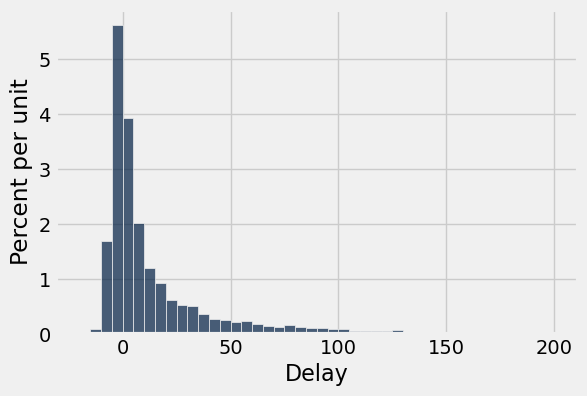

In [38]:
united_bins = np.arange(-20, 201, 5)
united.hist('Delay', bins = united_bins)

In [39]:
min(united.column('Delay'))

-16

In [40]:
max(united.column('Delay'))

580

In [41]:
np.average(united.column('Delay'))

16.658155515370705

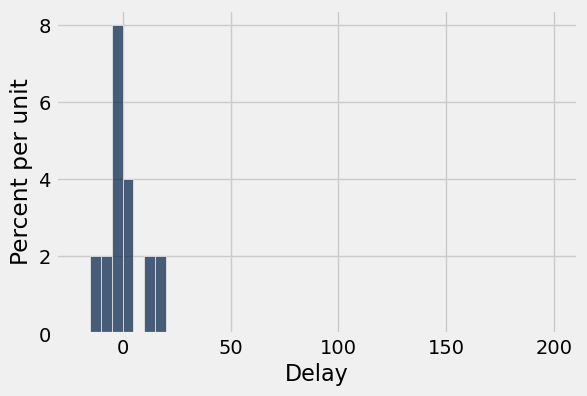

In [42]:
united.sample(10).hist('Delay', bins = united_bins)

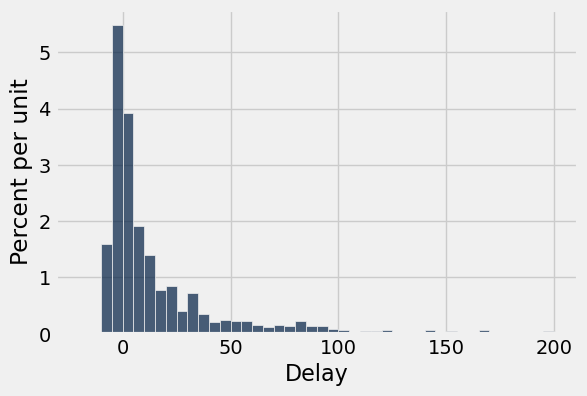

In [43]:
united.sample(1000).hist('Delay', bins = united_bins)

## Simulating Statistics ##

In [44]:
np.median(united.column('Delay'))

2.0

In [45]:
np.median(united.sample(10).column('Delay'))

3.0

In [46]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [47]:
sample_median(10)

2.5

In [48]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

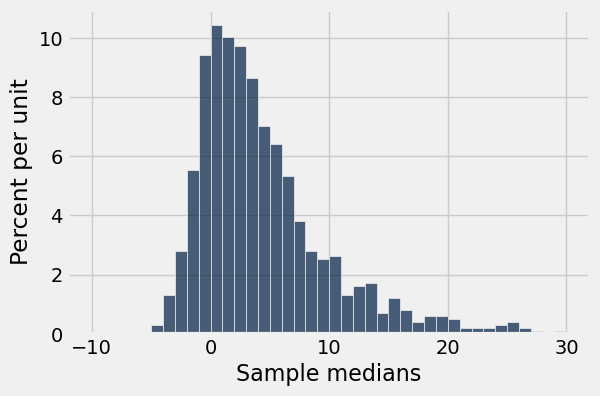

In [49]:
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

In [50]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

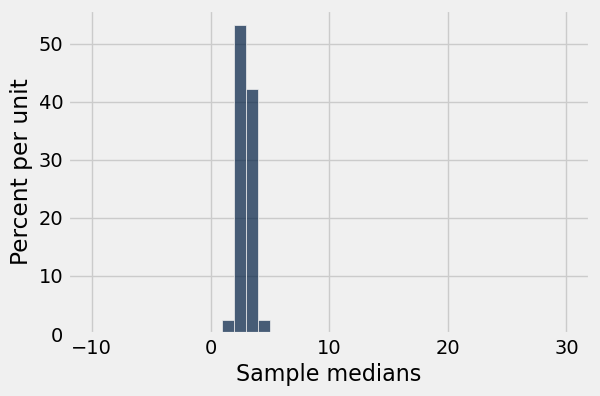

In [51]:
Table().with_column(
    'Sample medians', sample_medians).hist(bins = np.arange(-10,31))

## Swain vs. Alabama ##

In [52]:
population_proportions = make_array(.26, .74)
population_proportions

array([ 0.26,  0.74])

In [53]:
sample_proportions(100, population_proportions)

array([ 0.28,  0.72])

In [54]:
def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

In [55]:
panel_proportion()

0.25

In [56]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

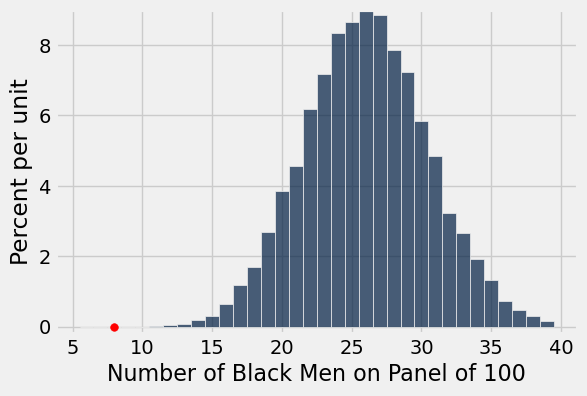

In [57]:
Table().with_column(
    'Number of Black Men on Panel of 100', panels
).hist(bins=np.arange(5.5,40.))

# Plotting details; ignore this code
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30);

## The GSI's Defense ##

In [58]:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [59]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [60]:
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [61]:
observed_average = 13.6667 

In [62]:
random_sample = scores.sample(27, with_replacement=False)
random_sample

Section,Midterm
2,22
5,25
2,8
1,14
2,21
5,21
6,12
1,15
1,21
6,17


In [63]:
np.average(random_sample.column('Midterm'))

16.962962962962962

In [64]:
# Simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class

def random_sample_midterm_avg():
    random_sample = scores.sample(27, with_replacement = False)
    return np.average(random_sample.column('Midterm'))

In [65]:
# Simulate 50,000 copies of the test statistic

sample_averages = make_array()

for i in np.arange(50000):
    sample_averages = np.append(sample_averages, random_sample_midterm_avg())

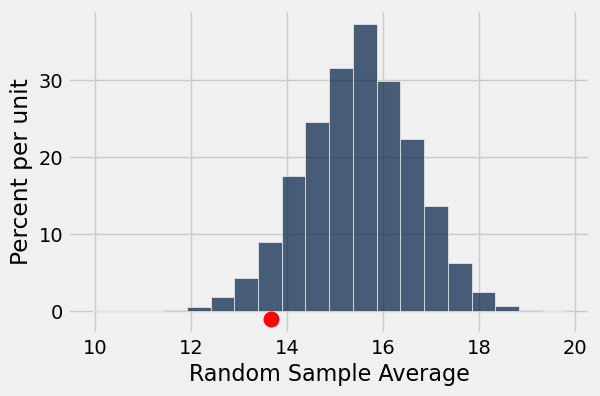

In [66]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic
averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
plots.scatter(observed_average, -0.01, color='red', s=120);

### Approach 1

In [67]:
# (1) Calculate the p-value: simulation area beyond observed value
np.count_nonzero(sample_averages <= observed_average) / 50000
# (2) See if this is less than 5%

0.05794

### Visual Representation

NameError: name 'five_percent_point' is not defined

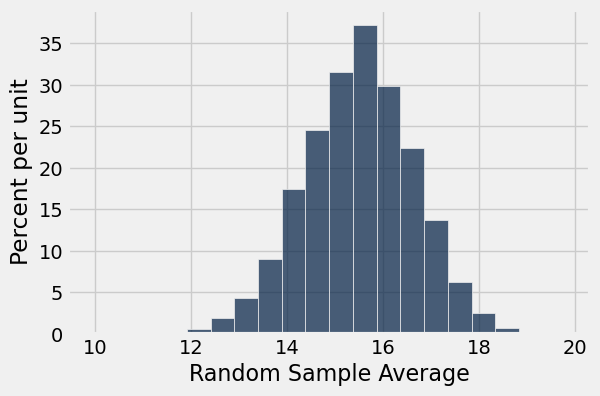

In [68]:
averages_tbl.hist(bins = 20)
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plots.title('Area to the left of the gold line: 5%');
plots.scatter(observed_average, -0.01, color='red', s=120);